# Gio logo

Seems like we should be able to make something with mpl.

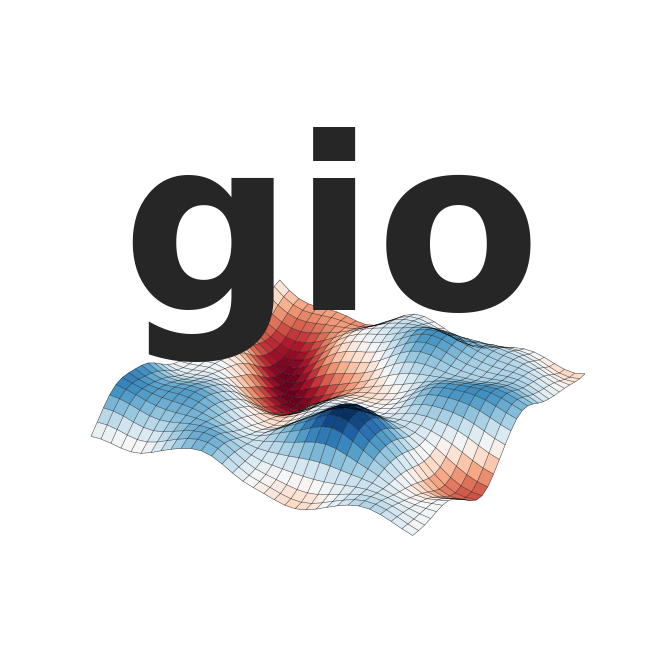

In [1]:
from gio import logo

_ = logo.plot()

## For unmap

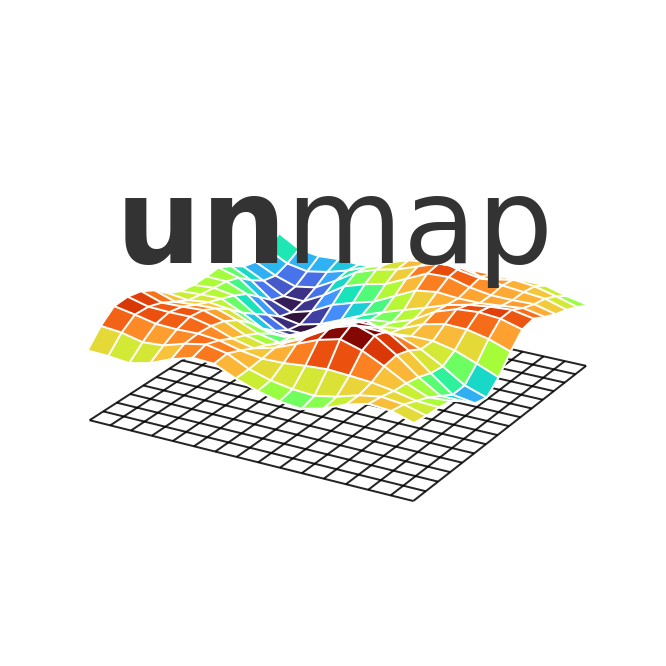

In [69]:
import hashlib

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LightSource

from gio import generate_random_surface


def plot(ax=None, fname=None):
    """
    Plots as a side effect. Pass in a 3d Axes if you want. Pass a filename
    to save the plot.
    """
    size = 16
    seed = int(hashlib.sha1("gio".encode()).hexdigest(), 16)

    if ax is None:
        fig = plt.figure(figsize=(12, 12))
        fig.patch.set_facecolor('none')
        ax = fig.add_subplot(projection='3d', facecolor='none')

    ax.set_box_aspect(aspect = (1,1,0.75))
    X = np.arange(0, size)
    Y = np.arange(0, size)
    X, Y = np.meshgrid(X, Y)
    Z = generate_random_surface(size, res=2, octaves=2, random_seed=seed)
    Z = 200 * Z + 600
    ax.axis('off')
    
    ax.plot_wireframe(X, Y, np.ones_like(Z) + 300, color='k', lw=2.0, alpha=0.85)

    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='turbo')
    ax.plot_wireframe(X, Y, Z, color='w', lw=2.0)
    c = cm.get_cmap('gray')
    ax.text(-10, 17, 200, r"$\mathbf{un}\mathrm{map}$", size=120, zorder=10, color=c(0.2))
    ax.set_zlim(0, 1200)
    ax.view_init(elev=23.)
    
    if fname is not None:
        plt.savefig(fname, dpi=200, bbox_inches='tight')

    plt.show()

    return ax

# Save the logo.
from io import BytesIO
imb = BytesIO()
plot(fname=imb)

# Remove 100 px from the edges.
from PIL import Image
img = Image.open(imb)
w, h = img.size
x = 100
imo = img.crop((x, x, w-x, h-x))
imo.save('_static/unmap.png')